In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data from: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [93]:
raw_data = pd.read_csv("train.csv", index_col=0)

In [94]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Nans appear in columns LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

As we see nan MasVnrType have mostly, exept some otliners, objects with zero MasVnrArea, so nan is a new categorical value, same true for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond

In [95]:
raw_data[raw_data['MasVnrType'].isna() & raw_data['MasVnrArea'] != 0]['MasVnrArea']

Id
625     288.0
774       1.0
1231      1.0
1301    344.0
1335    312.0
Name: MasVnrArea, dtype: float64

In [96]:
clean_data = raw_data.drop(raw_data[raw_data['MasVnrType'].isna() & raw_data['MasVnrArea'] != 0].index)

In [97]:
clean_data[clean_data[['BsmtQual', 'BsmtCond', 'BsmtExposure']].isna().any(axis=1)][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF', 'BsmtUnfSF']]

,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,BsmtUnfSF
Id,,,,,
18,NaN,NaN,NaN,0,0
40,NaN,NaN,NaN,0,0
91,NaN,NaN,NaN,0,0
103,NaN,NaN,NaN,0,0
157,NaN,NaN,NaN,0,0
183,NaN,NaN,NaN,0,0
260,NaN,NaN,NaN,0,0
343,NaN,NaN,NaN,0,0
363,NaN,NaN,NaN,0,0


In [98]:
clean_data = clean_data.drop(index=949)

In [99]:
clean_data[clean_data[['BsmtFinType1', 'BsmtFinType2']].isna().any(axis=1)][['BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1','BsmtFinSF2']]

,BsmtFinType1,BsmtFinType2,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2
Id,,,,,,
18,NaN,NaN,0,0,0,0
40,NaN,NaN,0,0,0,0
91,NaN,NaN,0,0,0,0
103,NaN,NaN,0,0,0,0
157,NaN,NaN,0,0,0,0
183,NaN,NaN,0,0,0,0
260,NaN,NaN,0,0,0,0
333,GLQ,NaN,3206,1603,1124,479
343,NaN,NaN,0,0,0,0


In [100]:
clean_data = clean_data.drop(index=333)

In [101]:
clean_data[clean_data['FireplaceQu'].isna() & (clean_data['Fireplaces'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [102]:
clean_data[clean_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isna().any(axis=1) & (clean_data['GarageArea'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [103]:
clean_data[clean_data['GarageArea'] == 0]['GarageYrBlt'].notna().any()

False

In [104]:
clean_data[clean_data['PoolQC'].isna() & (clean_data['PoolArea'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


Nan in Electrical is outliner

In [105]:
clean_data[clean_data['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [106]:
clean_data = clean_data.drop(index=1380)

Most likely that nan in Alley, Fence, MiscFeature also represents cat. value 

In [122]:
from sklearn.model_selection import train_test_split

train_data = clean_data.copy()
y = train_data.pop('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.15)

In [123]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.LFm = None
        self.MVAm = None
    def fit(self, X, y=None):
        self.LFm = X['LotFrontage'].mean() 
        self.MVAm = X['MasVnrArea'].mean()
        return self
    def transform(self, X: pd.DataFrame):
        columns=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                 'Alley', 'Fence', 'MiscFeature']
        X_ans = X.copy()
        X_ans.loc[:, columns] = X_ans.loc[:, columns].fillna('None')
        X_ans['GarageYrBlt'] = X_ans['GarageYrBlt'].fillna(0)
        X_ans['LotFrontage'] = X_ans['LotFrontage'].fillna(self.LFm)
        X_ans['MasVnrArea'] = X_ans['MasVnrArea'].fillna(self.MVAm)
        return X_ans


In [124]:
from sklearn.metrics import make_scorer

def rmsle(x, y):
    return np.sqrt(np.mean(np.square(np.abs(np.log1p(x) - np.log1p(y)))))

scorer = make_scorer(rmsle, greater_is_better=False)

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

pipe1 = Pipeline([('imputer', Imputer()),
                  ('encoder', OneHotEncoder(handle_unknown='ignore')),
                  ('regressor', GradientBoostingRegressor(random_state=42))])

In [127]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'regressor__max_depth': np.arange(3, 15),
              'regressor__learning_rate': [1, 1e-1, 1e-2, 1e-3],
              'regressor__n_estimators': np.arange(50, 3000, 100),
              'regressor__loss': ['squared_error', 'absolute_error', 'huber'],
              'regressor__criterion': ['friedman_mse', 'squared_error'],
              'regressor__max_features': ['sqrt', 'log2'],
              'regressor__min_samples_split': np.arange(2, 15),
              'regressor__min_samples_leaf': np.arange(1, 15)}
model1 = RandomizedSearchCV(pipe1, param_grid, cv=5, n_iter=50, refit=True, scoring=scorer, n_jobs=6)
model1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imputer', Imputer()),
                                             ('encoder',
                                              OneHotEncoder(handle_unknown='ignore')),
                                             ('regressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=50, n_jobs=6,
                   param_distributions={'regressor__criterion': ['friedman_mse',
                                                                 'squared_error'],
                                        'regressor__learning_rate': [1, 0.1,
                                                                     0.01,
                                                                     0.001],
                                        'regressor__loss': ['square...
                                        'regressor__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'regressor__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'regressor__n_estimators': array([  50,  150,  250,  350,  450,  550,  650,  750,  850,  950, 1050,
       1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150,
       2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950])},
                   scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

0.15804861297108225


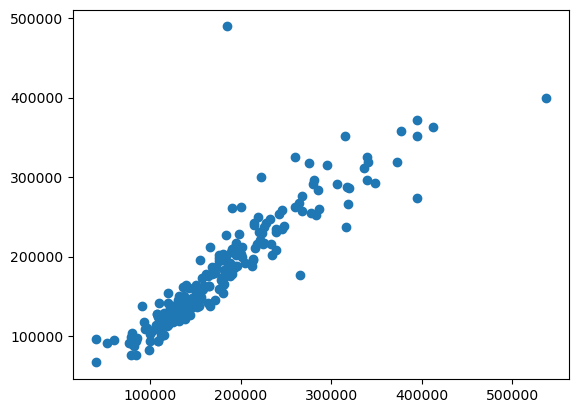

In [128]:
from sklearn.metrics import root_mean_squared_log_error

pred = model1.predict(X_test)
print(root_mean_squared_log_error(pred, y_test))
plt.scatter(y_test, pred)

In [163]:
import pickle

with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)